### Problem Statement - 
__Find publicly available data for key factors that influence US home prices nationally. Then,build a data science model that explains how these factors impacted home prices over the last 20years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices__


In [1]:
import warnings
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,GridSearchCV 


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


### Data Collection - 

__Afetr reading so many articles about Home price index in US I came to know that there are two major factor that are affecting home price in Us nationally. __
 Data on factors affecting the housing market’s  are supply and demand were gathered from publicly available sources (https://fred.stlouisfed.org/).
Limited housing supply and high demand can drive up prices, while an oversupply may lead to lower prices
 
__in Supply we got so many factors( Permit.MSACSR,TLRESCONS) that decides the price index for home in US 
__ In demand we got factors like (EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS)

__This datasets contain quarterly data on key supply-demand factors that influence US home prices nationally.
    

#### Sources-

- personal income- https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*rvamh2*_ga*NTU0NjA4Mjg3LjE3MDIzMTc4ODM.*_ga_J4698JNNFT*MTcwMjMxNzg4My4xLjEuMTcwMjMyMDI4NS4wLjAuMA..#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjYwIl0sWyJGaXJzdF9ZZWFyIiwiMjAwMyJdLFsiTGFzdF9ZZWFyIiwiMjAyMyJdLFsiU2NhbGUiLCItOSJdLFsiU2VyaWVzIiwiUSJdLFsiU2VsZWN0X2FsbF95ZWFycyIsIjEiXV19


- Permit- https://fred.stlouisfed.org/series/PERMIT1

- MSACSR - https://fred.stlouisfed.org/series/MSACSR

- TLESCONS-https://fred.stlouisfed.org/series/TLRESCONS

- EVACANTUSQ176N-https://fred.stlouisfed.org/series/EVACANTUSQ176N

- INTDSRUSM193N- https://fred.stlouisfed.org/series/INTDSRUSM193N

- UMCSENT - https://fred.stlouisfed.org/series/UMCSENT

- GDP - https://fred.stlouisfed.org/series/GDP

- MORTGAGE15US- https://fred.stlouisfed.org/series/MORTGAGE15US

- MSPUS- https://fred.stlouisfed.org/series/MSPUS


All this data are from 2003 to 2023 (20 years)

### Data Preparation-

- After Collecting all the data from the source I consolidated the data into a single a file (homellcdata.csv)

### Accesing the data and converting it ino Dataframe

In [2]:
df=pd.read_csv('homellcdata.csv')
df.head()

,year,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS,price_index
0,2003-Q1,5.03,1377.333333,4.200000,421328.6667,14908,2.250000,79.966667,11174.129,5.204615,186000,129.321333
1,2003-Q2,5.10,1413.666667,3.833333,429308.6667,15244,2.166667,89.266667,11312.766,4.867692,191800,131.756000
2,2003-Q3,5.17,1510.666667,3.633333,458890.0000,15614,2.000000,89.300000,11566.669,5.356923,191900,135.013333
3,2003-Q4,5.26,1542.666667,3.966667,491437.3333,15654,2.000000,91.966667,11772.234,5.256154,198800,138.834667
4,2004-Q1,5.27,1583.666667,3.700000,506856.3333,15895,2.000000,98.000000,11923.447,4.872727,212700,143.299000


In [3]:
df.columns

Index(['year', 'Personal Income(in $million)', 'Permit', 'MSACSR', 'TLRESCONS',
       'EVACANTUSQ176N', 'INTDSRUSM193N', 'UMCSENT', 'GDP', 'MORTGAGE15US',
       'MSPUS', 'price_index'],
      dtype='object')

### Column Description:- 
- year :- this column has quarter for each year from 2003-2023(20 years data)
- Personal Income(in million) :- Income levels and employment rates are key indicators of a population's ability to afford housing. Higher incomes generally support higher home prices
- Permit : This variable represents the number of new housing units authorized for construction in permit-issuing places.
- MSACSR(Monthly Supply of New Houses in the United States)- It indicates the monthly supply of new houses available in the US
- TLRESCONS(Total Construction Spending):- This variable represents the total construction spending on residential projects.
- EVACANTUSQ176N - It provides an estimate of the number of vacant housing units in the United States
- INTDSRUSM193N - This column represents the interest rates or discount rates for the United States.
- UMCSENT(University of Michigan: Consumer Sentiment)- It measures the consumer sentiment index based on surveys conducted by the University of Michigan.
- GDP- Gross Domestic Product
- MORTGAGE15US - It indicates the average interest rate for a 30-year fixed-rate mortgage.
- MSPUS - Median Sales Price of Houses Sold for the United States 
- price_index  - This variable serves as a proxy for home prices and represents the home price index for the United States.This is our label for this dataset

In [4]:
 # Checking the shape
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 83 Rows and 12 Columns in our dataframe


,year,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS,price_index
0,2003-Q1,5.03,1377.333333,4.200000,421328.6667,14908,2.250000,79.966667,11174.129,5.204615,186000,129.321333
1,2003-Q2,5.10,1413.666667,3.833333,429308.6667,15244,2.166667,89.266667,11312.766,4.867692,191800,131.756000
2,2003-Q3,5.17,1510.666667,3.633333,458890.0000,15614,2.000000,89.300000,11566.669,5.356923,191900,135.013333
3,2003-Q4,5.26,1542.666667,3.966667,491437.3333,15654,2.000000,91.966667,11772.234,5.256154,198800,138.834667
4,2004-Q1,5.27,1583.666667,3.700000,506856.3333,15895,2.000000,98.000000,11923.447,4.872727,212700,143.299000


In [5]:
#checking for null values
df.isnull().sum()

year                            0
Personal Income(in $million)    0
Permit                          0
MSACSR                          0
TLRESCONS                       0
EVACANTUSQ176N                  0
INTDSRUSM193N                   8
UMCSENT                         0
GDP                             0
MORTGAGE15US                    0
MSPUS                           0
price_index                     0
dtype: int64

In [6]:
 ## Looks like we got only 8 null values in the INTDSRUSM193N column lets check its statstic for filling the values
df['INTDSRUSM193N'].describe()

count    75.000000
mean      1.938889
std       1.732448
min       0.250000
25%       0.750000
50%       1.000000
75%       2.541667
max       6.250000
Name: INTDSRUSM193N, dtype: float64

In [7]:
# Since the data is Continous so Filled the null value susing mean method
df['INTDSRUSM193N']=df['INTDSRUSM193N'].fillna(df['INTDSRUSM193N'].mean())

In [8]:
df['INTDSRUSM193N'].isnull().sum()

0

In [9]:
df.isnull().sum()

year                            0
Personal Income(in $million)    0
Permit                          0
MSACSR                          0
TLRESCONS                       0
EVACANTUSQ176N                  0
INTDSRUSM193N                   0
UMCSENT                         0
GDP                             0
MORTGAGE15US                    0
MSPUS                           0
price_index                     0
dtype: int64

In [10]:
#Cheking info()- This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          83 non-null     object 
 1   Personal Income(in $million)  83 non-null     float64
 2   Permit                        83 non-null     float64
 3   MSACSR                        83 non-null     float64
 4   TLRESCONS                     83 non-null     float64
 5   EVACANTUSQ176N                83 non-null     int64  
 6   INTDSRUSM193N                 83 non-null     float64
 7   UMCSENT                       83 non-null     float64
 8   GDP                           83 non-null     float64
 9   MORTGAGE15US                  83 non-null     float64
 10  MSPUS                         83 non-null     int64  
 11  price_index                   83 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 7.9+ KB


So we from above information we can see that we got 83 non null entries in our datset that means we have no null or misssing values in our dataset also with 11 float and 1 object datatype.

In [11]:
df.describe()

,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS,price_index
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,7.635663,889.494980,6.216064,505259.248992,17051.216867,1.938889,81.759036,17617.994120,4.134555,284472.289157,185.081968
std,1.802239,381.738388,1.898726,190344.432418,1397.893677,1.645770,12.521620,4191.128485,1.233405,70648.570858,46.702384
min,5.030000,358.333333,3.366667,246953.333300,13876.000000,0.250000,56.100000,11174.129000,2.171429,186000.000000,129.321333
25%,6.310000,619.000000,4.950000,359693.166700,15785.500000,0.750000,72.983333,14506.499500,3.126401,228450.000000,148.223667
50%,7.100000,802.666667,5.633333,506856.333300,17258.000000,1.583333,82.833333,16728.687000,3.844615,264800.000000,174.580000
75%,8.905000,1119.166667,7.483333,591055.500000,18198.000000,2.291667,92.766667,20454.732500,5.284560,321500.000000,202.544500
max,11.900000,1745.333333,11.400000,973236.666700,19137.000000,6.250000,98.933333,27644.463000,6.396154,479500.000000,309.032333


#### Observatons-
Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

there is sign of skewness in few columns that we check later on

### Exploratory Data Analysis

In [12]:
df.columns

Index(['year', 'Personal Income(in $million)', 'Permit', 'MSACSR', 'TLRESCONS',
       'EVACANTUSQ176N', 'INTDSRUSM193N', 'UMCSENT', 'GDP', 'MORTGAGE15US',
       'MSPUS', 'price_index'],
      dtype='object')

### Univariate Analysis
__Exploring continus columns__

In [13]:
## COntinous column
numerical_cols= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are:\n", numerical_cols)


Number Data Type Columns are:
 ['Personal Income(in $million)', 'Permit', 'MSACSR', 'TLRESCONS', 'EVACANTUSQ176N', 'INTDSRUSM193N', 'UMCSENT', 'GDP', 'MORTGAGE15US', 'MSPUS', 'price_index']


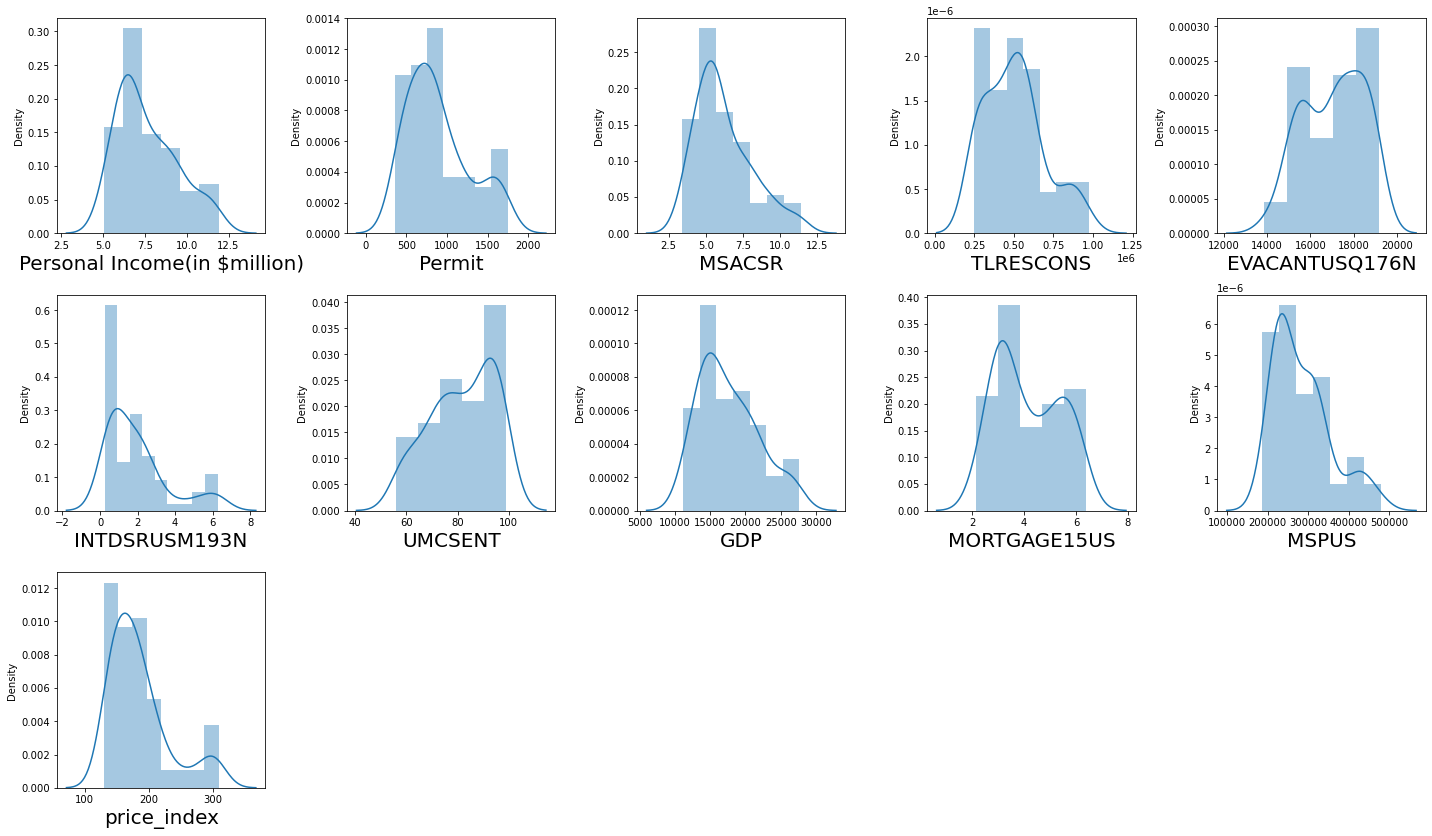

In [14]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df[numerical_cols]:
    if plot_number<=20: 
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

- Except price_index(label column) we see some skewness in permit,MSACSR,TLRESCONS ,INTDSRUSM193N,GDP,MSPUS columnslets check wit .ske method to confirm the skewness

In [15]:
df[numerical_cols].skew()

Personal Income(in $million)    0.693947
Permit                          0.745394
MSACSR                          0.923787
TLRESCONS                       0.590446
EVACANTUSQ176N                 -0.246561
INTDSRUSM193N                   1.394812
UMCSENT                        -0.397624
GDP                             0.625702
MORTGAGE15US                    0.269950
MSPUS                           1.000970
price_index                     1.326674
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. Having said that we will treat the skewness that is present in our continous data columns later in the project.

### Bivariate Analyis

#### 1- year VS price_index


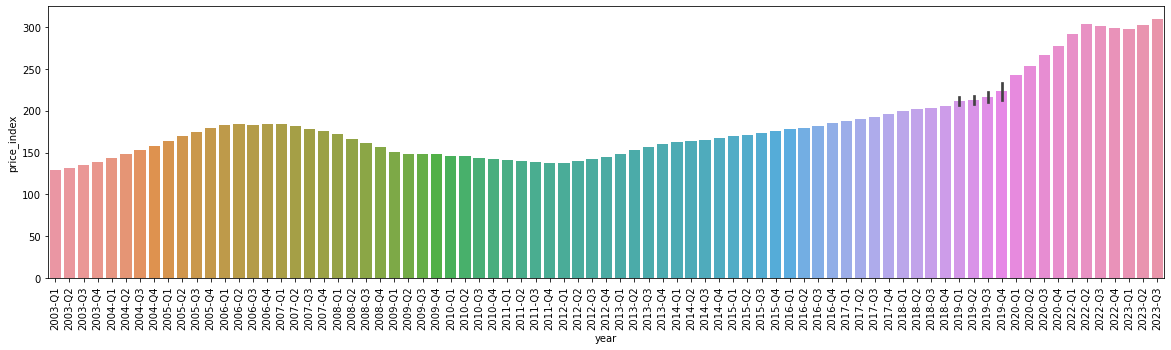

In [16]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year', y='price_index',data=df)
plt.xticks(rotation='90')
#plt.savefig("1.jpg")
plt.show()

__This bar plot clerly show that price index is increasing from 2003 although it shows some downfalll in the year 2012 but after 2012 it keeps on increasing__

### 2- Personal Income(in $million) VS price_index

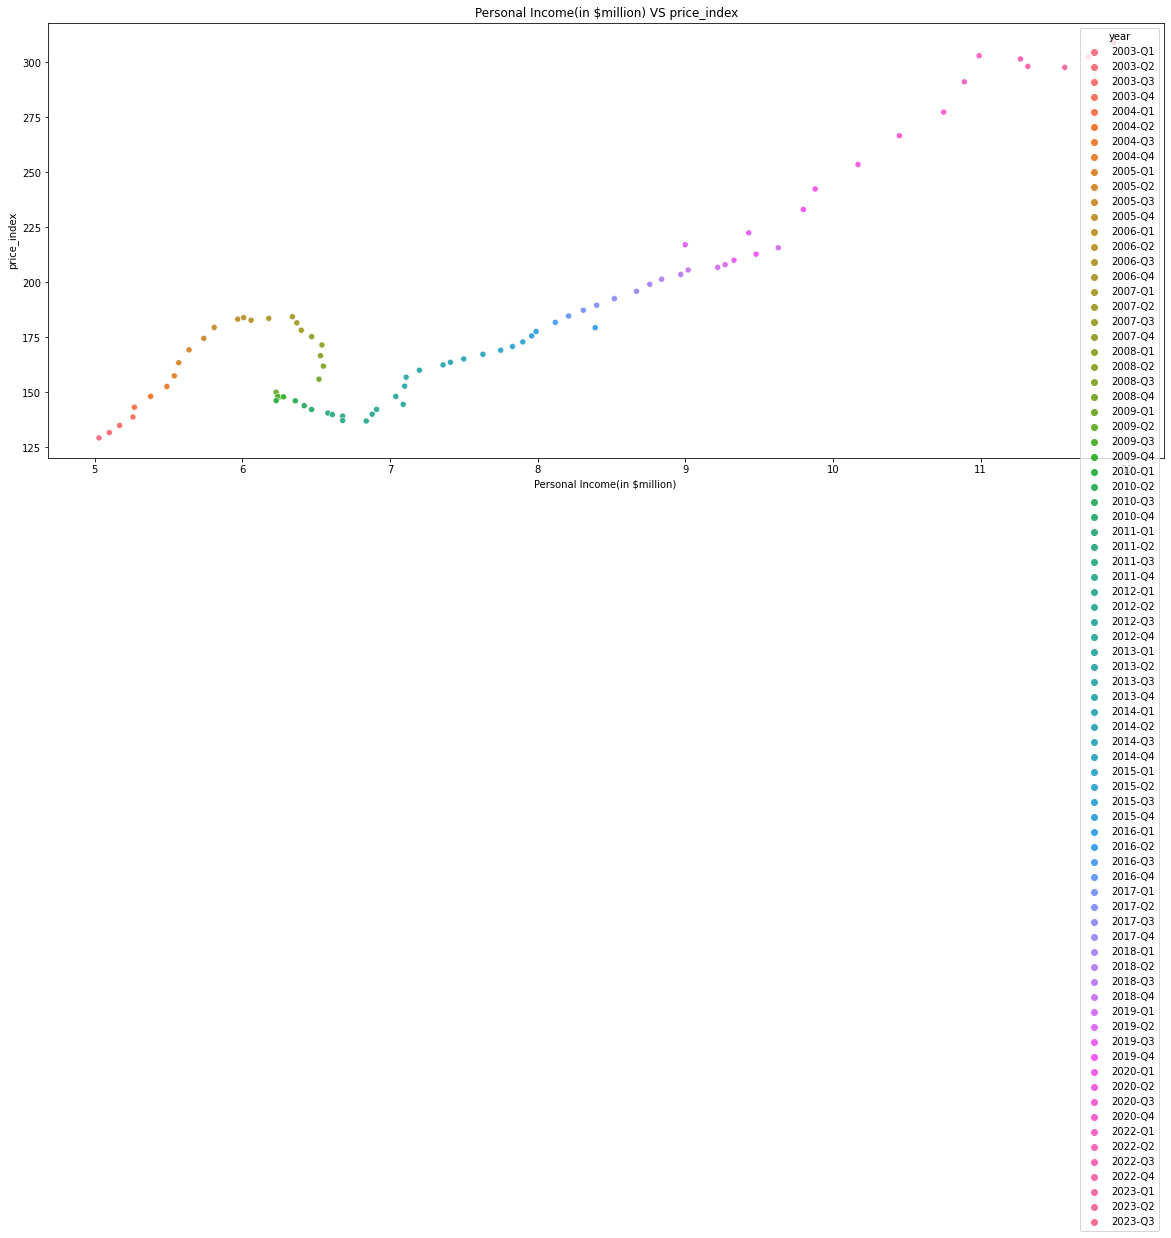

In [17]:
plt.figure(figsize=(20,8),facecolor='white')
sns.scatterplot(x='Personal Income(in $million)', y='price_index',data=df,hue='year')
# Add labels and title
plt.xlabel('Personal Income(in $million) ')
plt.ylabel('price_index')
plt.title('Personal Income(in $million) VS price_index')



# Show the plot
plt.show()

- __in the year 2009-2010 we see some downfall in the price index of the house but after that price and income are kept on increasing__


### 3- Permit VS price_index

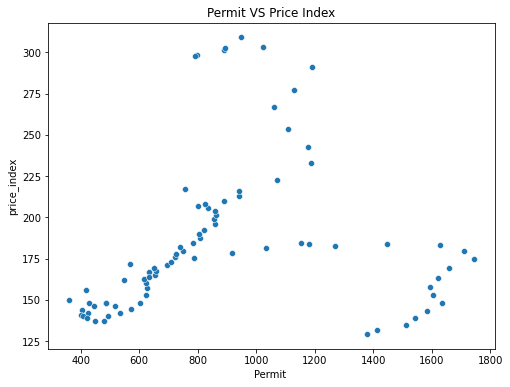

In [18]:
plt.figure(figsize=(8,6),facecolor='white')
sns.scatterplot(x='Permit', y='price_index',data=df)
# Add labels and title
plt.xlabel('Permit ')
plt.ylabel('price_index')
plt.title('Permit VS Price Index')



# Show the plot
plt.show()

- PriceIndex are higher when Permit is in range between 800-1000 units that means when there is limited supply price definietly will go higher but when there is higher supply its definately has negative impact on price index

### 3- MSACSR VS price Index

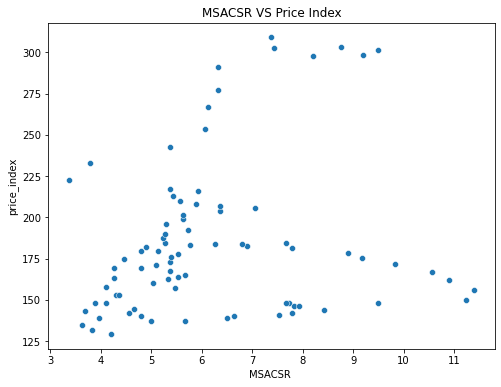

In [19]:
plt.figure(figsize=(8,6),facecolor='white')
sns.scatterplot(x='MSACSR', y='price_index',data=df)
# Add labels and title
plt.xlabel('MSACSR ')
plt.ylabel('price_index')
plt.title('MSACSR VS Price Index')



# Show the plot
plt.show()

- There is a weak positive relationship between the monthly supply of new houses and price index. This suggests that as the supply of new houses increases, it may have a slight positive impact on home prices.

### 4- TLRESCONS VS price Index

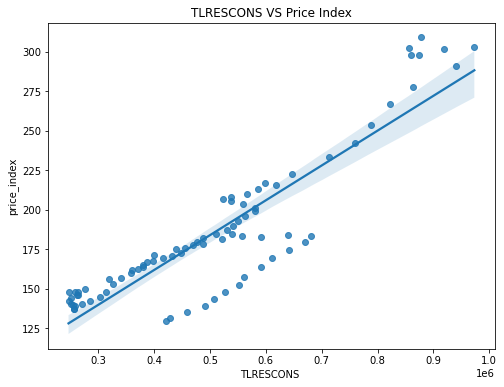

In [20]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='TLRESCONS', y='price_index',data=df)
# Add labels and title
plt.xlabel('TLRESCONS ')
plt.ylabel('price_index')
plt.title('TLRESCONS VS Price Index')



# Show the plot
plt.show()

- TLRESCONS(Total Construction Spending: Residential) is directly imapcting on the Price index in above graph means its highly positively related with price index column.This suggests that higher construction spending is strongly associated with higher home prices.

#### 5- EVACANTUSQ176N   VS price_index               -
                       

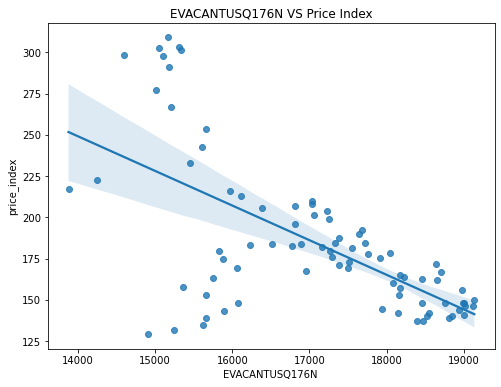

In [21]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='EVACANTUSQ176N', y='price_index',data=df)
# Add labels and title
plt.xlabel('EVACANTUSQ176N ')
plt.ylabel('price_index')
plt.title('EVACANTUSQ176N VS Price Index')



# Show the plot
plt.show()

- EVACANTUSQ176N (Housing Inventory Estimate: Vacant Housing Units):This indicates that a higher number of vacant housing units may exert downward pressure on home prices.its negatively correlated with Price index

#### 6- INTDSRUSM193N   VS price_index

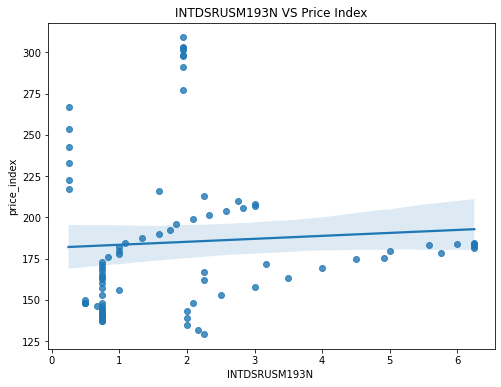

In [22]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='INTDSRUSM193N', y='price_index',data=df)
# Add labels and title
plt.xlabel('INTDSRUSM193N ')
plt.ylabel('price_index')
plt.title('INTDSRUSM193N VS Price Index')



# Show the plot
plt.show()

- This is simple when interst rate are high definietly home price will be less . it less positively related to home price index

#### 7-UMCSENT VS price_index

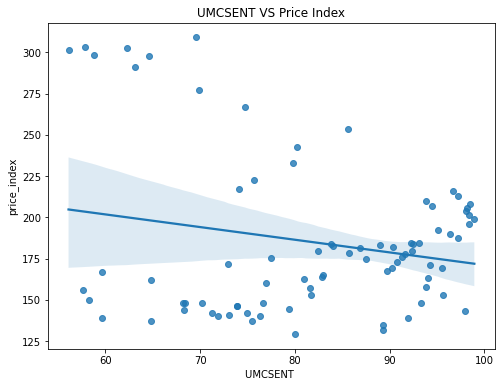

In [23]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='UMCSENT', y='price_index',data=df)
# Add labels and title
plt.xlabel('UMCSENT ')
plt.ylabel('price_index')
plt.title('UMCSENT VS Price Index')



# Show the plot
plt.show()

- Lower consumer sentiment is associated with slightly lower home prices. Means when Consumer are more confident with the ecomnomy they will not hesitate to pay high price for the house

#### 7- GDP VS price_index

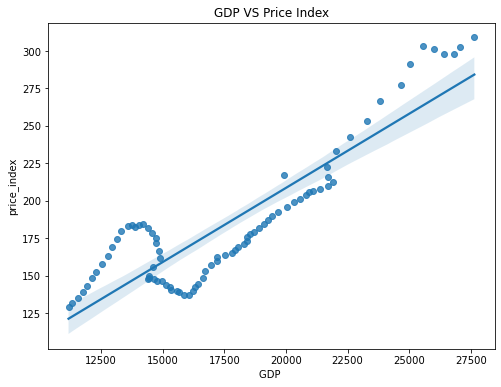

In [24]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='GDP', y='price_index',data=df)
# Add labels and title
plt.xlabel('GDP ')
plt.ylabel('price_index')
plt.title('GDP VS Price Index')



# Show the plot
plt.show()

- GDP(Gross Domestic Product ) is Highly related to price_index means as soon as GDP is high Price index will always be higher

#### 8-MORTGAGE15US VS price_index
            

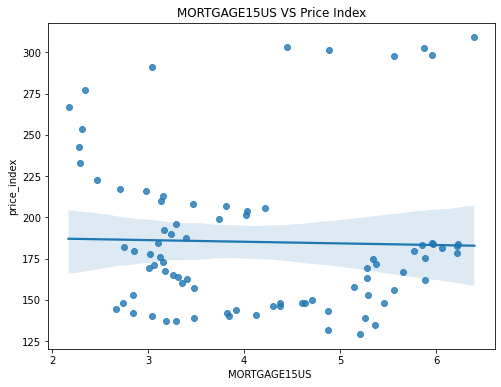

In [25]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='MORTGAGE15US', y='price_index',data=df)
# Add labels and title
plt.xlabel('MORTGAGE15US ')
plt.ylabel('price_index')
plt.title('MORTGAGE15US VS Price Index')



# Show the plot
plt.show()


- Home Price Index is decrasinf as soon as average interest rate is increasing there is decline in home price index

#### 9- MSPUS VS price_index

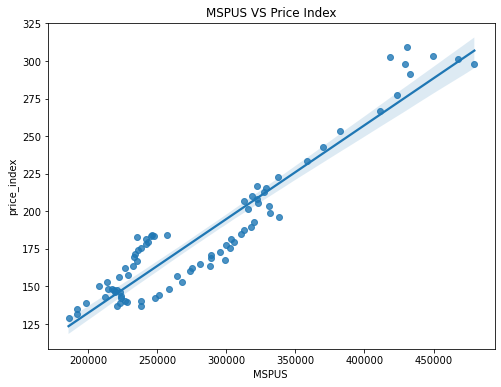

In [26]:
plt.figure(figsize=(8,6),facecolor='white')
sns.regplot(x='MSPUS', y='price_index',data=df)
# Add labels and title
plt.xlabel('MSPUS ')
plt.ylabel('price_index')
plt.title('MSPUS VS Price Index')



# Show the plot
plt.show()


- MSPUS is strongly related with price index we can see in above regression plot

#### Multivariate Analysis

In [27]:
#creating different datframe for each Quarter i.e Q1,Q2,Q3,Q4

df_first_quarter = df[df['year'].apply(lambda x: x.endswith('-Q1'))]
df_second_quarter = df[df['year'].apply(lambda x: x.endswith('-Q2'))]
df_third_quarter = df[df['year'].apply(lambda x: x.endswith('-Q3'))]
df_fourth_quarter = df[df['year'].apply(lambda x: x.endswith('-Q4'))]



In [28]:
### Q1 of each year and Permit VS price_index

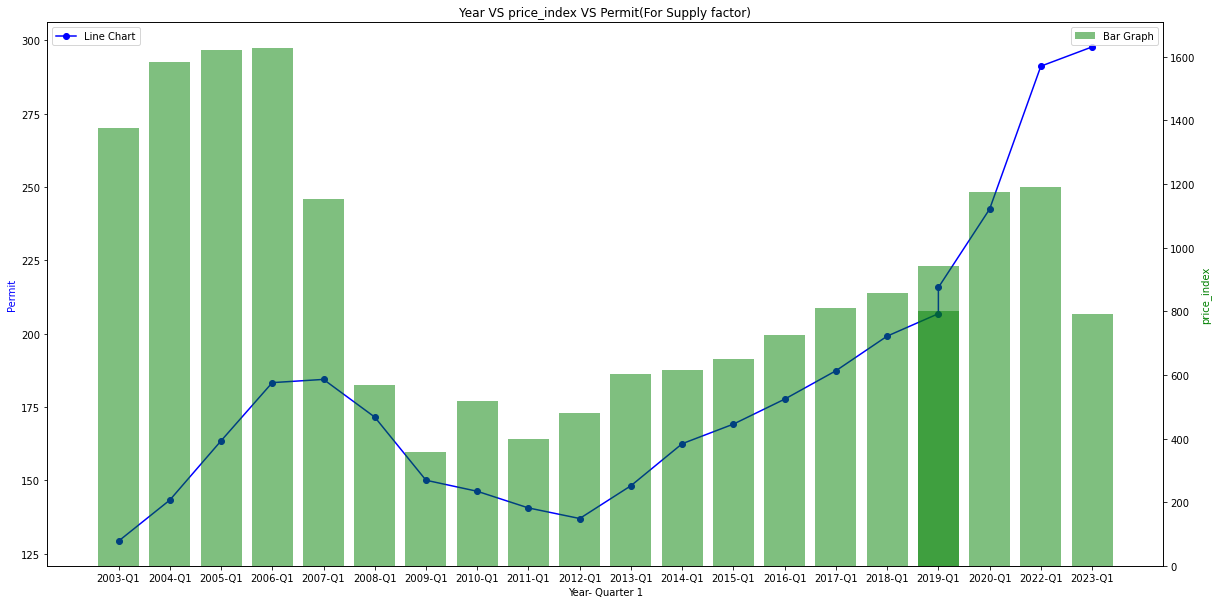

In [29]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['Permit'], alpha=0.5, color='green', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('Permit', color='blue')
ax2.set_ylabel('price_index', color='green')
plt.title('Year VS price_index VS Permit(For Supply factor)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- (PERMIT) is an economic factor that measures the number of new privately-owned housing units authorized by building permits in permit-issuing places. It is used to gauge the strength of the housing market and the overall economy. The issuance of residential building permits can be a barometer for consumer confidence and solvency.

- The number of new privately-owned housing units authorized has a moderate positive correlation with home prices. This suggests that the approval of the construction of more housing units tends to raise home prices. This is because a decrease in the supply of homes, workers and material causes an increase in price.

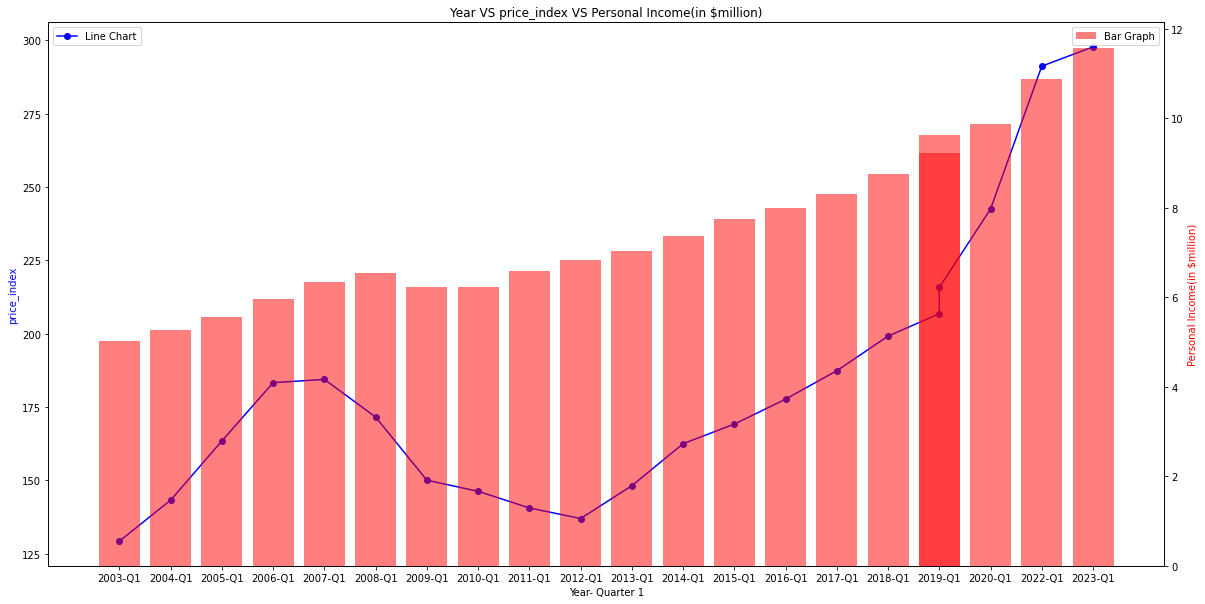

In [30]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['Personal Income(in $million)'], alpha=0.5, color='red', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('Personal Income(in $million)', color='red')
plt.title('Year VS price_index VS Personal Income(in $million)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- We have also seen previuosly that personal Income has a big impact on price_index. if People of US has more income they will surely invest in better project which surely increase the price index for house

#### Q1 VS MSACSR VS price_index

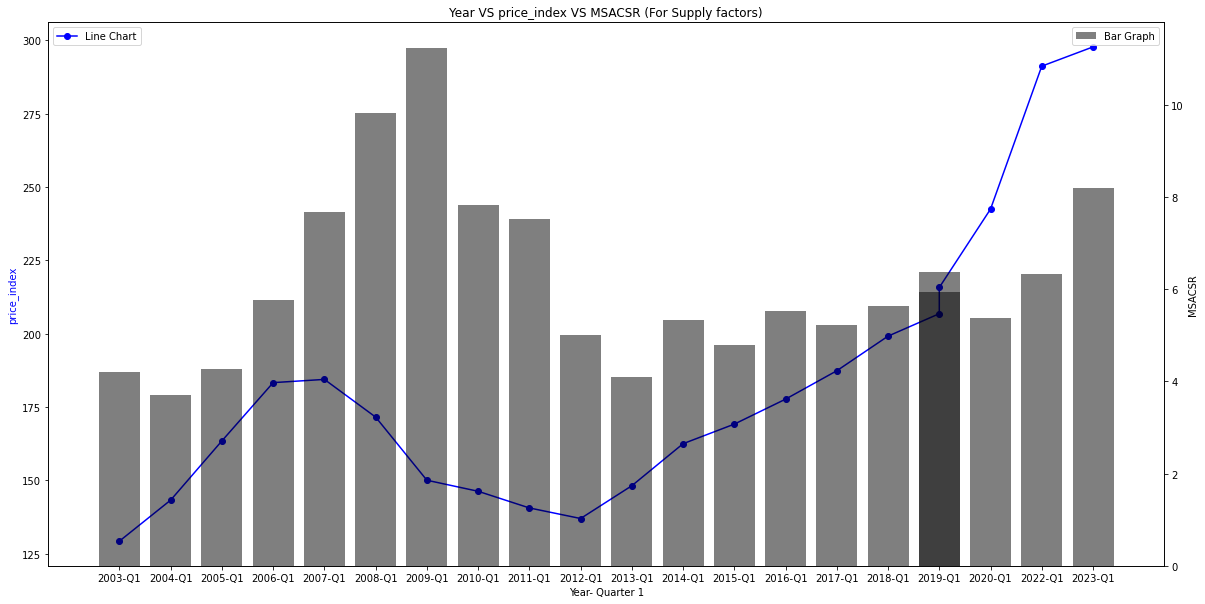

In [31]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['MSACSR'], alpha=0.5, color='black', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('MSACSR', color='black')
plt.title('Year VS price_index VS MSACSR (For Supply factors)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


The monthly supply of new houses has a negative correlation with home prices. This means that increase in MSACSR could lead to a decrease in Price Index. This is because an increase in supply of new houses could lead to a decrease in demand which could lead to a decrease in prices.

### Q1 VS price_index_VS TLRESCONS


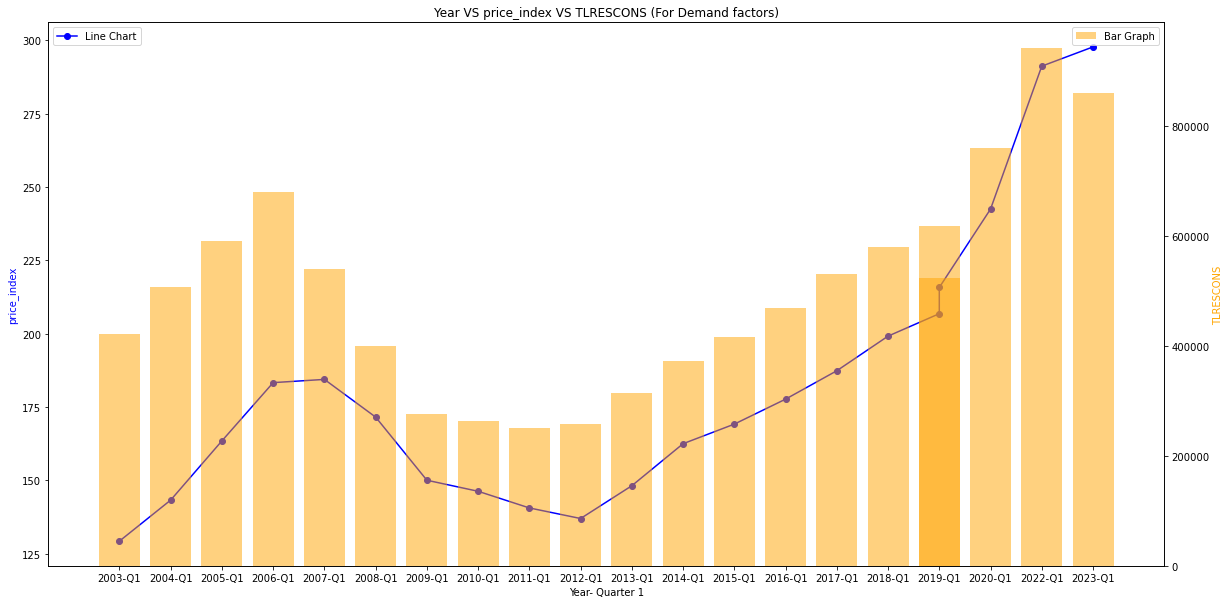

In [32]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['TLRESCONS'], alpha=0.5, color='orange', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('TLRESCONS', color='orange')
plt.title('Year VS price_index VS TLRESCONS (For Demand factors)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- As long as TLRESCONS(Total Cost spending on construction) keeps on icreasing price_index will also be incraesed.The reason for this is simple: construction costs include building materials, labor, and other charges. This raises overall house costs.

#### Q1 VS price_index VS INTDSRUSM193N

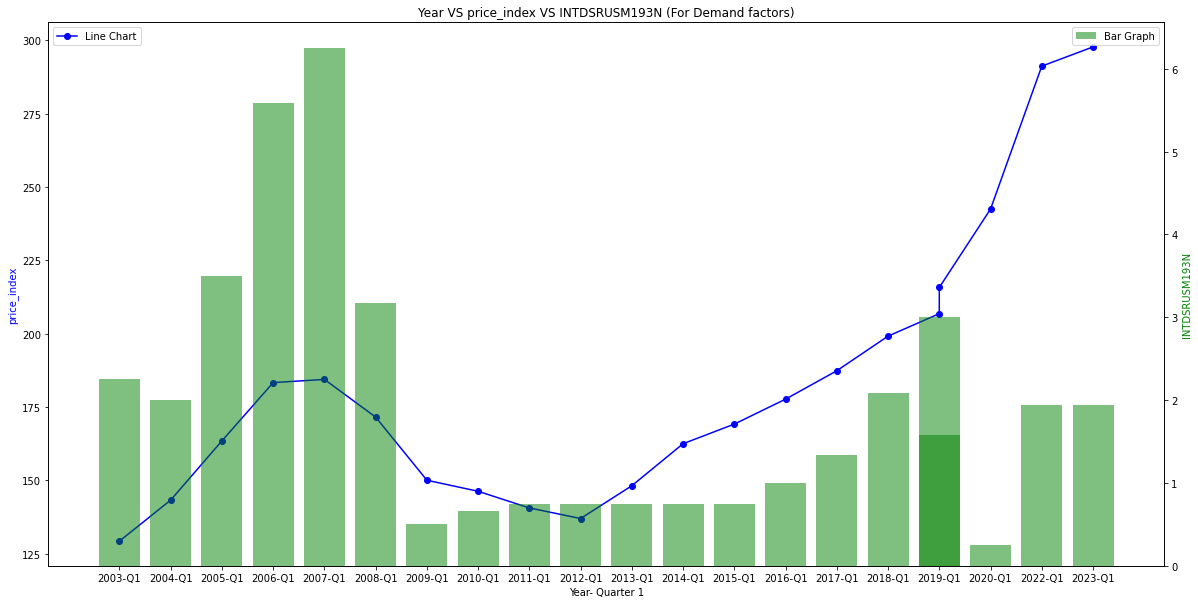

In [33]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['INTDSRUSM193N'], alpha=0.5, color='green', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('INTDSRUSM193N', color='green')
plt.title('Year VS price_index VS INTDSRUSM193N (For Demand factors)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- INTDSRUSM193N-interest rates or discount rates are weakly realted to home prices that means highr the interest rate lower the price index

#### Q1 VS price_index VS GDP

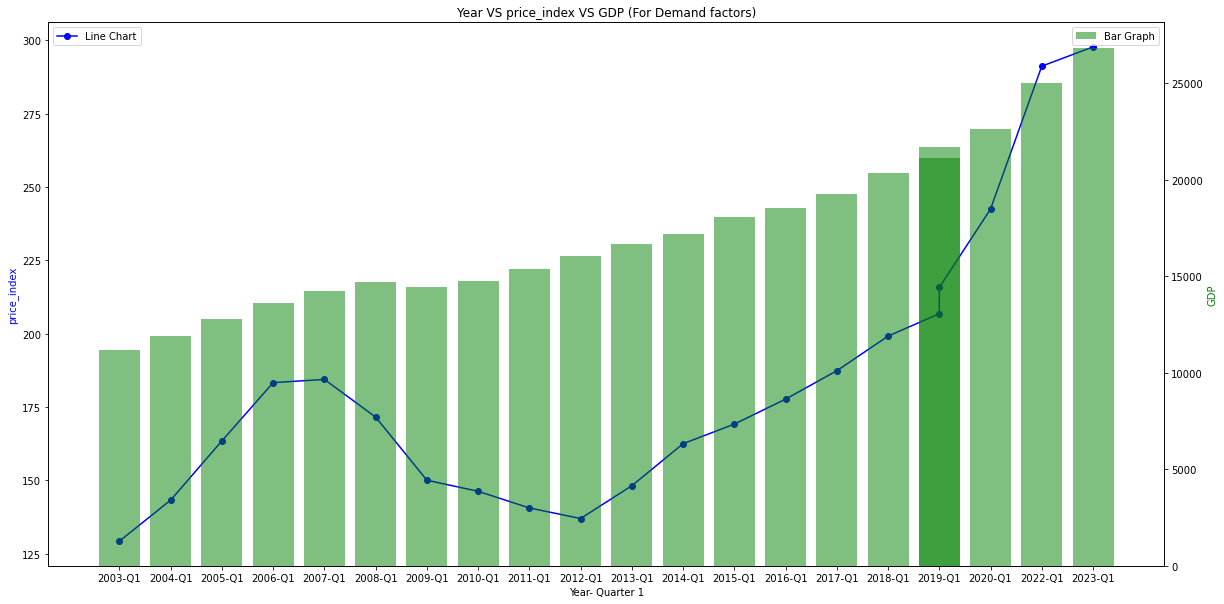

In [34]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['GDP'], alpha=0.5, color='green', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('GDP', color='green')
plt.title('Year VS price_index VS GDP (For Demand factors)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- As long as GDP is higher Price index will also rises.its strongly realted to Price_index

### Q1 VS price_index VS MSPUS

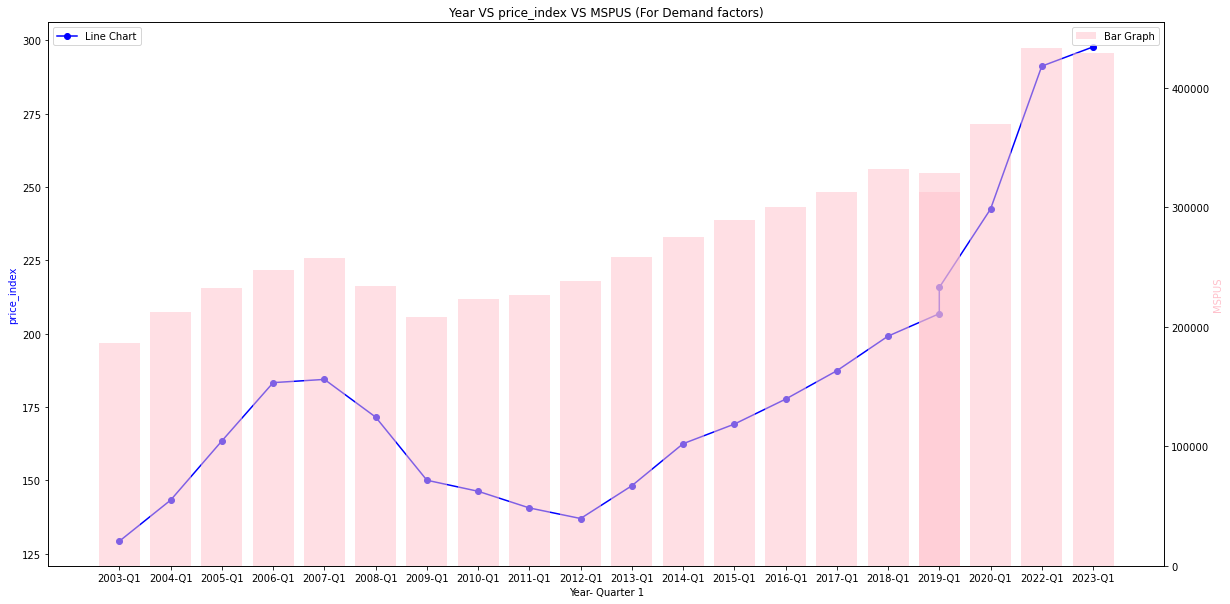

In [36]:
# Create a figure and axis

fig, ax1 = plt.subplots(figsize=(20,10))

# Plot the line chart
ax1.plot(df_first_quarter['year'], df_first_quarter['price_index'], color='blue', marker='o', label='Line Chart')

# Create a second y-axis for the bar graph
ax2 = ax1.twinx()
ax2.bar(df_first_quarter['year'], df_first_quarter['MSPUS'], alpha=0.5, color='pink', label='Bar Graph')

# Add labels and title
ax1.set_xlabel('Year- Quarter 1')
ax1.set_ylabel('price_index', color='blue')
ax2.set_ylabel('MSPUS', color='pink')
plt.title('Year VS price_index VS MSPUS (For Demand factors)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


- MSPUS i.e Median Sale Price are highly realted with price index as we can see taht in Q1 all the MSP are higher so is Price_index

- Now since we analyzed the data , we initially found some skewness in our columnsbefore proceedding further I need to make sure there is no o less skewness in our columns


## Using Log Transform to fix skewness¶

In [37]:
for col in numerical_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [38]:
df[numerical_cols].skew()

Personal Income(in $million)    0.377310
Permit                          0.070731
MSACSR                          0.420000
TLRESCONS                      -0.120525
EVACANTUSQ176N                 -0.246561
INTDSRUSM193N                   0.557704
UMCSENT                        -0.397624
GDP                             0.215310
MORTGAGE15US                    0.269950
MSPUS                           0.574825
price_index                     0.899402
dtype: float64

- Here we have handled the skewness in continous data.now all the continous colums are in accetepable range of skewness(+/-.5)

### Correlation using a Heatmap

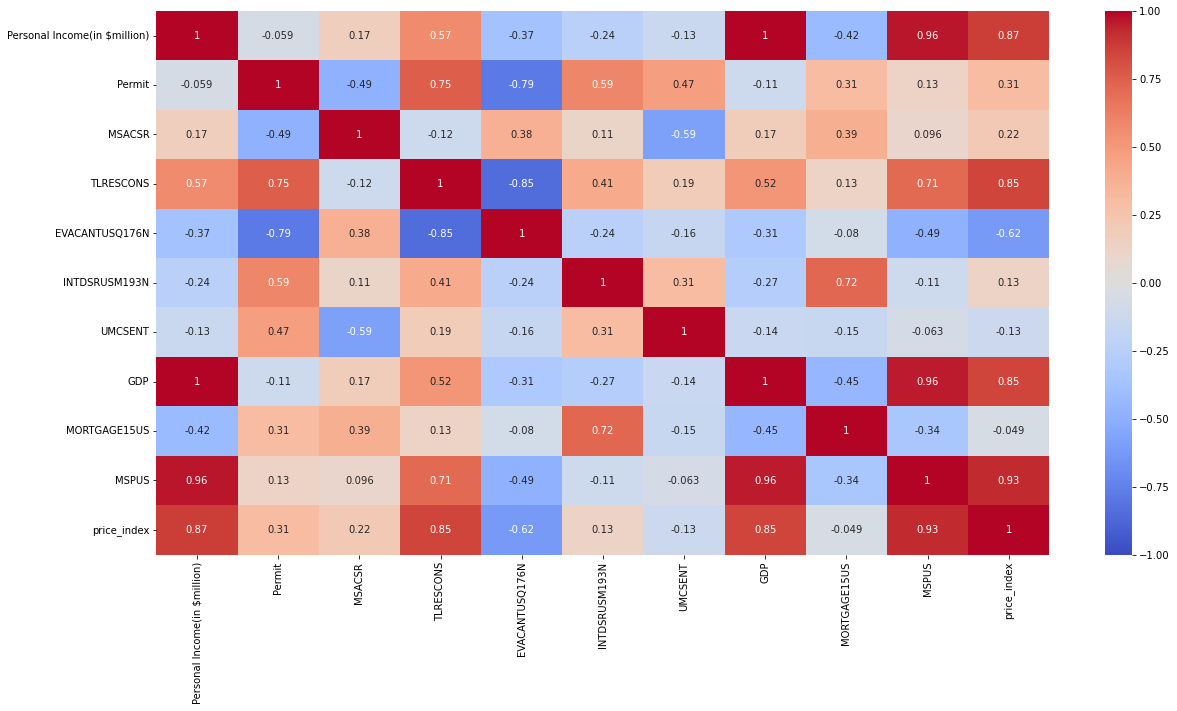

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together (MSPUS,Personal Income,TLRESCONS,GDP,Permit,MSACSR).
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down (INTDSRUSM193N,MORTGAGE15US,UMCSENT,EVACANTUSQ176N).

In the above heatmap we can see the correlation details plus we can determine that there is some multi colinearity issue between our columns like 
- MSPUS & Personal Income(0.96)
- GDP & MSPUS (0.96) and others as well

but we have very  less columns in our dataset so its not wise to drop these columns as of now.if there is no good Acuuray achieved definietly will do something  

## Correlation Bar Plot comparing features with our label

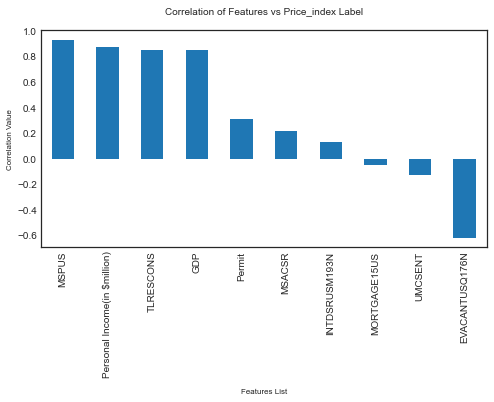

In [40]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(8,4))
df_corr['price_index'].sort_values(ascending=False).drop('price_index').plot.bar()
plt.title("Correlation of Features vs Price_index Label\n", fontsize=10)
plt.xlabel("\nFeatures List", fontsize=8)
plt.ylabel("Correlation Value", fontsize=8)
plt.show()

-Here Bar plot is giving us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column.
- postively realted columns with label column are - __MSPUS,Personal Income,TLRESCONS,GDP,Permit,MSACSR__

- Negatively related  columns with Label column are -__INTDSRUSM193N,MORTGAGE15US,UMCSENT,EVACANTUSQ176N__

## Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label¶

In [41]:
x=df.drop('price_index',axis=1)
y=df['price_index']
y

0     4.870003
1     4.888513
2     4.912753
3     4.940461
4     4.971888
        ...   
78    5.712307
79    5.701062
80    5.699556
81    5.715241
82    5.736677
Name: price_index, Length: 83, dtype: float64

In [42]:
y

0     4.870003
1     4.888513
2     4.912753
3     4.940461
4     4.971888
        ...   
78    5.712307
79    5.701062
80    5.699556
81    5.715241
82    5.736677
Name: price_index, Length: 83, dtype: float64

In [43]:
years = df['year']

In [44]:
x=x.drop(['year'], axis=1)

### Scaling the features


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
X_scaled=scaler.fit_transform(x)

### For Best Random State¶

In [48]:
lr=LinearRegression()

In [49]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1)):
        print("At random_state",i,"the model performed very well")
        print("At random_state",i)
        print("Trainning Score",r2_score(y_train,pred_train)*100)
        print("Testing Score",r2_score(y_test,pred_test)*100,'\n\n')
    

At random_state 13 the model performed very well
At random_state 13
Trainning Score 99.01365195833311
Testing Score 99.0210555376332 


At random_state 16 the model performed very well
At random_state 16
Trainning Score 98.97717970129334
Testing Score 99.02945041266081 


At random_state 23 the model performed very well
At random_state 23
Trainning Score 98.96053852327321
Testing Score 98.97060117680803 


At random_state 42 the model performed very well
At random_state 42
Trainning Score 99.01551116025092
Testing Score 99.03236485382638 


At random_state 53 the model performed very well
At random_state 53
Trainning Score 98.99796202353541
Testing Score 99.03639336260113 


At random_state 112 the model performed very well
At random_state 112
Trainning Score 99.03319891189795
Testing Score 98.9569471101221 


At random_state 113 the model performed very well
At random_state 113
Trainning Score 99.00839104670787
Testing Score 99.04736088354582 


At random_state 115 the model performed

In [50]:
# Selecting rando state 85
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20,random_state=85)

In [51]:
# Divided the dataset in 80:20 ratio that means 80% of the data is for training and rest 20% data is for testing

In [52]:
print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of x_train :  (66, 10)
Size of y_train :  (66,)
Size of x_test :  (17, 10)
Size of Y_test :  (17,)


### Single functin for different Regression Model


In [53]:
def reg(model,X_scaled,y):
    X_train, X_test, Y_train, Y_test=train_test_split(X_scaled,y,test_size=.30)
     
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # MSE - a lower RMSE score is better than a higher one
    mse = mean_squared_error(Y_test, pred)
    print("MSE Score is:", mse)
    
    #RMSE
    print("RMSE Score is:", np.sqrt(mse))
    
    # R2 score
    r2 = r2_score(Y_test, pred)*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X_scaled,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regression Model


In [54]:
model=LinearRegression()
reg(model, X_scaled,y)

MSE Score is: 0.0007375250874290934
RMSE Score is: 0.02715741312108157
R2 Score is: 98.17429018923983
Cross Validation Score: 58.22251009238247
R2 Score - Cross Validation Score is 39.951780096857355


### Ridge Regression

In [55]:
model=Ridge(alpha=0.05)
reg(model, X_scaled,y)

MSE Score is: 0.0008335519389724334
RMSE Score is: 0.028871299571935335
R2 Score is: 98.4229995849224
Cross Validation Score: 59.315020463097724
R2 Score - Cross Validation Score is 39.10797912182467


### Lasso Regression

In [56]:
model=Lasso(0.01)
reg(model, X_scaled,y)

MSE Score is: 0.0017363102021887003
RMSE Score is: 0.041669055691108486
R2 Score is: 97.22629652610213
Cross Validation Score: 24.055181142224725
R2 Score - Cross Validation Score is 73.1711153838774


### Support Vector Regression

In [57]:
model=SVR()
reg(model, X_scaled,y)

MSE Score is: 0.006258520159892156
RMSE Score is: 0.07911080937452325
R2 Score is: 91.2380320418729
Cross Validation Score: -281.88186617728
R2 Score - Cross Validation Score is 373.1198982191529


### AdaBoostRegressor

In [58]:
model=AdaBoostRegressor()
reg(model, X_scaled,y)

MSE Score is: 0.001562189938441273
RMSE Score is: 0.0395245485545537
R2 Score is: 97.63338631064997
Cross Validation Score: -152.53376421193752
R2 Score - Cross Validation Score is 250.1671505225875


### Random Forest Regressor

In [59]:
rfc=RandomForestRegressor()
reg(model, X_scaled,y)

MSE Score is: 0.0021443461748396338
RMSE Score is: 0.04630708557920304
R2 Score is: 94.67808757177465
Cross Validation Score: -151.9721879923648
R2 Score - Cross Validation Score is 246.65027556413946


__To select the best performing model, we used cross-validation with five folds. This technique helps assess the models’ performance on different subsets of the training data. We used the mean squared error (MSE) as the evaluation metric, where lower values indicate better performance.__

### Definietly Ridge Model is performin better than all models



In [60]:
ridge = Ridge(alpha=1.0)  

ridge.fit(x_train, y_train)

ridge_mse = mean_squared_error(y_test, ridge.predict(x_test))
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = ridge.score(x_test, y_test)

# Perform cross-validation
ridge_cv_score = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2').mean()

print("Ridge Regression Results:")
print(f"MSE Score: {ridge_mse}")
print(f"RMSE Score: {ridge_rmse}")
print(f"R2 Score: {ridge_r2}")
print(f"Cross Validation Score: {ridge_cv_score}")


Ridge Regression Results:
MSE Score: 0.0010558438249160414
RMSE Score: 0.032493750551699035
R2 Score: 0.977612982440919
Cross Validation Score: 0.5567246235350294


__RidgeCV is a convenient way to apply Ridge Regression with cross-validated hyperparameter tuning. It combines the Ridge Regression model with the process of selecting the best alpha through cross-validationoverfirring issue so lets use Ridgecv model to reduce any overfitting of the model__

In [61]:
from sklearn.linear_model import RidgeCV

alphas = [0.1, 1.0, 10.0]  # Specify the alpha values to consider
ridgecv_model = RidgeCV(alphas=alphas, store_cv_values=True)  # Set store_cv_values=True to access cross-validation results

# Fit RidgeCV model
ridgecv_model.fit(x_train, y_train)

# Get the optimal alpha
best_alpha = ridgecv_model.alpha_

# Evaluate RidgeCV model
ridgecv_mse = mean_squared_error(y_test, ridgecv_model.predict(x_test))
ridgecv_r2=r2_score(y_test, ridgecv_model.predict(x_test))
print(f"RidgeCV Regression MSE: {ridgecv_mse}")
print(f"RidgeCV r2 score: {ridgecv_r2}")

RidgeCV Regression MSE: 0.0012437523427187474
RidgeCV r2 score: 0.9736287650895653




RidgeCV Regression MSE: 0.0012437523427187474: This is the mean squared error, a measure of the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.

RidgeCV R2 Score: 0.9736287650895653: The R2 score, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score of 0.97 is excellent, indicating that your RidgeCV model captures a large portion of the variance in the target variable.

- RidgeCV is perfroming better than Ridge model

## Our final Model is RidgeCV

### Visualising the final model


In [62]:
ridgecv_model.fit(x_train, y_train)
ridgecv_train=ridgecv_model.predict(x_train)
ridgecv_test=ridgecv_model.predict(x_test)

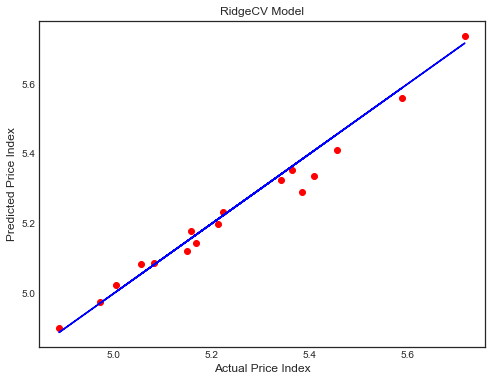

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ridgecv_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price Index",fontsize=12)
plt.ylabel("Predicted Price Index",fontsize=12)
plt.title("RidgeCV Model")
plt.show()


## Saving the final model


In [64]:
import pickle


In [65]:
filename=('homeprice_index.pkl')


In [66]:
pickle.dump(ridgecv_model,open(filename,'wb'))


In [67]:
#conclusion
loaded_model=pickle.load(open('homeprice_index.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.36287650895653


__our final model is giving me 97% approx accuracy__



In [68]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],ridgecv_test[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Predcited,5.337091,5.178016,5.291651,5.737626,5.233423,5.121596,4.901116,5.324261,5.145598,5.024913,5.411445,5.197731,5.083528,5.086693,5.559857,5.35459,4.97714
Orignal,5.337091,5.178016,5.291651,5.737626,5.233423,5.121596,4.901116,5.324261,5.145598,5.024913,5.411445,5.197731,5.083528,5.086693,5.559857,5.35459,4.97714


# Prediction For 2023-Q4 to 2025-Q4

__on the basis of collected data , made the assumption for  this new csv file  which contains only input not  the output and then accessed.__

In [244]:
# Accessing csv file 
data=pd.read_csv('prediction.csv')
data

,Year,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS
0,2023 Q4,13.50,1758.33,5.2,521328.6667,18208,0.75,84.766667,29828.973,6.171429,441200
1,2024-Q1,14.50,1145.25,3.6,579308.6667,19009,0.85,79.900000,28654.603,6.338462,443600
2,2024-Q2,11.05,1123.74,8.5,459890.0000,19184,2.50,33.133333,28029.116,7.044615,463100
3,2024-Q3,15.50,1452.60,4.9,691437.3333,17312,2.75,77.866667,30044.273,4.450769,479300
4,2024-Q4,16.50,1784.25,7.8,516856.3333,19340,2.85,55.125110,30259.639,6.880769,478000
5,2025-Q1,18.90,1551.32,9.0,956483.3333,18593,0.75,57.800000,29408.405,7.159231,489500
6,2025-Q2,19.20,1785.32,8.0,752939.0000,16102,1.93,69.600000,28813.601,6.815385,489000
7,2025-Q3,11.50,1655.20,8.9,801413.3333,14049,2.00,68.300000,29063.012,7.070769,499500
8,2025-Q4,15.20,1922.30,9.8,902790.3333,14172,2.32,71.600000,30644.463,7.396154,501000


In [245]:
#checking shape
print("We have {} Rows and {} Columns in our dataframe".format(data.shape[0], data.shape[1]))
data.head()

We have 9 Rows and 11 Columns in our dataframe


,Year,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS
0,2023 Q4,13.50,1758.33,5.2,521328.6667,18208,0.75,84.766667,29828.973,6.171429,441200
1,2024-Q1,14.50,1145.25,3.6,579308.6667,19009,0.85,79.900000,28654.603,6.338462,443600
2,2024-Q2,11.05,1123.74,8.5,459890.0000,19184,2.50,33.133333,28029.116,7.044615,463100
3,2024-Q3,15.50,1452.60,4.9,691437.3333,17312,2.75,77.866667,30044.273,4.450769,479300
4,2024-Q4,16.50,1784.25,7.8,516856.3333,19340,2.85,55.125110,30259.639,6.880769,478000


### Applying Preprocessing steps on this data

In [246]:
data.isnull().sum()

Year                            0
Personal Income(in $million)    0
Permit                          0
MSACSR                          0
TLRESCONS                       0
EVACANTUSQ176N                  0
INTDSRUSM193N                   0
UMCSENT                         0
GDP                             0
MORTGAGE15US                    0
MSPUS                           0
dtype: int64

In [247]:
X=data.drop('Year',axis=1)
X.shape

(9, 10)

In [248]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [249]:
X_scaled.shape

(9, 10)

In [250]:
#prediction using loaded_model 
predictions = loaded_model.predict(X_scaled)

In [251]:
print("Shape of X:", X.shape)
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of predictions:", predictions.shape)

Shape of X: (9, 10)
Shape of X_scaled: (9, 10)
Shape of predictions: (9,)


In [252]:
predictions

array([5.08137823, 4.79185222, 4.85285986, 5.14141754, 5.34865057,
       5.4216637 , 5.27667721, 5.24876754, 5.60488918])

In [253]:
data['Predicted price Index']=predictions

In [254]:
data

,Year,Personal Income(in $million),Permit,MSACSR,TLRESCONS,EVACANTUSQ176N,INTDSRUSM193N,UMCSENT,GDP,MORTGAGE15US,MSPUS,Predicted price Index
0,2023 Q4,13.50,1758.33,5.2,521328.6667,18208,0.75,84.766667,29828.973,6.171429,441200,5.081378
1,2024-Q1,14.50,1145.25,3.6,579308.6667,19009,0.85,79.900000,28654.603,6.338462,443600,4.791852
2,2024-Q2,11.05,1123.74,8.5,459890.0000,19184,2.50,33.133333,28029.116,7.044615,463100,4.852860
3,2024-Q3,15.50,1452.60,4.9,691437.3333,17312,2.75,77.866667,30044.273,4.450769,479300,5.141418
4,2024-Q4,16.50,1784.25,7.8,516856.3333,19340,2.85,55.125110,30259.639,6.880769,478000,5.348651
5,2025-Q1,18.90,1551.32,9.0,956483.3333,18593,0.75,57.800000,29408.405,7.159231,489500,5.421664
6,2025-Q2,19.20,1785.32,8.0,752939.0000,16102,1.93,69.600000,28813.601,6.815385,489000,5.276677
7,2025-Q3,11.50,1655.20,8.9,801413.3333,14049,2.00,68.300000,29063.012,7.070769,499500,5.248768
8,2025-Q4,15.20,1922.30,9.8,902790.3333,14172,2.32,71.600000,30644.463,7.396154,501000,5.604889


### Conclusion


- Supply factors, such as house inventory and the number of authorized housing units, have a positive influence on home prices. Higher construction spending on residential projects also contributes significantly to higher home prices.

- Demand factor, such as mortgage interest rates, have a negative impact on home prices. Higher mortgage rates and lower consumer sentiment are associated with slightly lower home prices.

- Economic factors, including GDP and interest rates, play a crucial role in determining home prices. A strong economy with higher GDP and slightly lower interest rates tends to support higher home prices.

- The median sales price of houses sold is strongly correlated with home prices, reflecting the importance of market dynamics and buyer behaviour in determining home price movements.

- These insights can be valuable for various stakeholders in the real estate market, including home buyers, sellers, developers, and policymakers. Understanding the factors that influence home prices can help make informed decisions related to investments, financing, and economic policies.